In [8]:
# All the imports and packages used
import pandas as pd 
import researchpy as rp
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


# Read the dataset
df = pd.read_csv('rq3_2dataset.csv')

# RQ3 - Two way ANOVA for topic and filters effect on perceived trust

In [9]:
df['Filter'] = df['Filter'].apply(lambda x: 1 if x != 0 else x)

In [10]:
model = ols('Avg ~ C(Filter) + C(Topic) + C(Topic)*C(Filter)', data=df).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Filter),4.936149,1.0,6.266374,1.250136e-02
C(Topic),82.429613,3.0,34.881088,3.329665e-21
C(Topic):C(Filter),18.457249,3.0,7.810408,3.826640e-05
Residual,636.477925,808.0,NaN,NaN


In [11]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Filter),4.936149,1.0,4.936149,6.266374,1.250136e-02,0.006650,0.005583
C(Topic),82.429613,3.0,27.476538,34.881088,3.329665e-21,0.111046,0.107748
C(Topic):C(Filter),18.457249,3.0,6.152416,7.810408,3.826640e-05,0.024865,0.021658
Residual,636.477925,808.0,0.787720,NaN,NaN,NaN,NaN


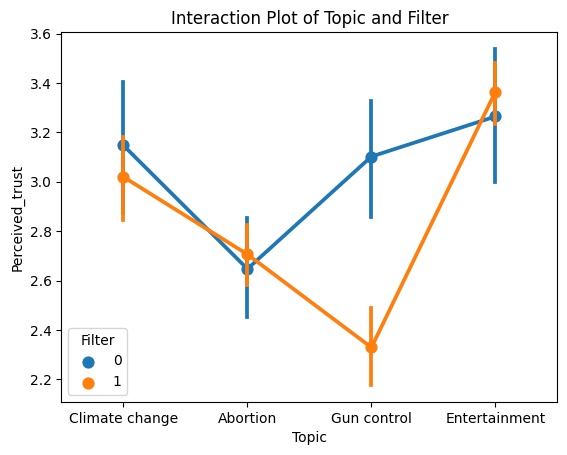

In [12]:
sns.pointplot(x='Topic', y='Avg', hue='Filter', data=df)

# Add labels and a title
plt.xlabel('Topic')
plt.ylabel('Perceived_trust')
plt.title('Interaction Plot of Topic and Filter')

# Show the plot
plt.show()